# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split , GridSearchCV , RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform, loguniform
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

## Importing Dataset 

In [2]:
df = pd.read_csv('Dataset/processed.cleveland.data')

In [3]:
df.head()

,63.0,1.0,1.0.1,145.0,233.0,1.0.2,2.0,150.0,0.0,2.3,3.0,0.0.1,6.0,0
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


## Column Header Assignment Using cleve.mod file

In [4]:
attributes = ['age','gender','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','result']
df.columns = attributes

In [5]:
df.head()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,result
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


## Column Description


| Column Name | Description                                                                                               |
| ----------- | --------------------------------------------------------------------------------------------------------- |
| age         | Age of the patient (in years)                                                                             |
| sex         | Sex of the patient (1 = male, 0 = female)                                                                 |
| cp          | Chest pain type (0 = Typical angina, 1 = Atypical angina, 2 = Non-anginal pain, 3 = Asymptomatic)         |
| trestbps    | Resting blood pressure (in mm Hg)                                                                         |
| chol        | Serum cholesterol level (mg/dl)                                                                           |
| fbs         | Fasting blood sugar > 120 mg/dl (1 = true, 0 = false)                                                     |
| restecg     | Resting electrocardiographic results (0 = Normal, 1 = ST-T abnormality, 2 = Left ventricular hypertrophy) |
| thalach     | Maximum heart rate achieved                                                                               |
| exang       | Exercise-induced angina (1 = yes, 0 = no)                                                                 |
| oldpeak     | ST depression induced by exercise relative to rest                                                        |
| slope       | Slope of the peak exercise ST segment (0 = Upsloping, 1 = Flat, 2 = Downsloping)                          |
| ca          | Number of major vessels (0–3) colored by fluoroscopy                                                      |
| thal        | Thalassemia status (3 = Normal, 6 = Fixed defect, 7 = Reversible defect)                                  |
| target      | Presence of heart disease (0 = No disease, 1 = Disease present)                                           |


##  Handling Placeholder Missing Values Before EDA

Before performing Exploratory Data Analysis (Task 1), it's important to ensure that the dataset is clean and structured correctly. On inspecting the raw data, it was found that certain values were represented using a "?" placeholder instead of standard missing value markers.

In [6]:
# replace "?" with Nan
df.replace("?", np.nan, inplace=True)

# Task 1 : Data Understanding and Exploration (EDA)

This task focuses on gaining insights into the dataset, identifying potential data quality issues, and understanding relationships between variables.

**Objectives** :

A) Understand the structure and characteristics of the dataset.

B) Explore distributions of both numerical and categorical variables.

C) Identify missing values, outliers, and unusual patterns.

D) Analyze the balance of the target variable.

E) Explore how each feature relates to the target variable (presence or absence of heart disease).

### descriptive statistics for all numerical and categorical features

To begin our exploratory data analysis, we generate summary statistics for all the features in the dataset using the .describe() function. This includes key metrics such as:

**Count**: Number of non-null entries

**Mean**: Average value

**Standard deviation**: Spread of the values

**Minimum and Maximum**: Range of values

**25th, 50th, and 75th percentiles**: Distribution shape

**These statistics help us**:

A) Understand the scale and distribution of each feature

B) Detect potential outliers (via min/max)

C) Identify features that may require normalization or transformation

D) This step is crucial to guide further preprocessing and model design decisions.

In [7]:
df.describe()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,result
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.410596,0.678808,3.165563,131.645695,246.738411,0.145695,0.986755,149.605960,0.327815,1.035430,1.596026,0.940397
std,9.040163,0.467709,0.953612,17.612202,51.856829,0.353386,0.994916,22.912959,0.470196,1.160723,0.611939,1.229384
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000
50%,55.500000,1.000000,3.000000,130.000000,241.500000,0.000000,0.500000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


### Dataset Structure Overview
**To better understand the structure and completeness of the dataset, we use the .info() function. This provides an overview of:**

A) The number of entries (rows) in the dataset

B) The number of non-null (non-missing) values per column

C) The data type of each feature (e.g., integer, float, object)

D) Memory usage

**This step helps identify**:

A) Which columns may contain missing values

B) Which columns are not in the correct data type

C) How much data cleaning or type conversion may be needed

D) This information is critical before performing any transformations or statistical analysis.



In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    float64
 1   gender    302 non-null    float64
 2   cp        302 non-null    float64
 3   trestbps  302 non-null    float64
 4   chol      302 non-null    float64
 5   fbs       302 non-null    float64
 6   restecg   302 non-null    float64
 7   thalach   302 non-null    float64
 8   exang     302 non-null    float64
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    float64
 11  ca        298 non-null    object 
 12  thal      300 non-null    object 
 13  result    302 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.2+ KB


### Key Observations:
• All columns except ca and thal have complete (non-null) values.

• The columns ca and thal have missing values, with only 298 and 300 non-null entries, respectively.

• Most features are currently of float64 type, even those that represent categorical variables (e.g., gender, cp, fbs, etc.).

• The columns ca and thal are of object type, which indicates they likely contain non-numeric values (possibly "?") which have already replaced with NaN just before starting EDA.

• The result column is correctly recognized as an integer type.


### Inspecting Rows with Missing Values
After identifying that the ca and thal columns contain missing values, we examine the specific rows where these values are missing. This inspection helps us:

Understand the nature and distribution of the missing data

Determine whether the missing values are random or follow any pattern

Decide on an appropriate imputation strategy

By displaying a subset of columns (age, gender, ca, thal, result) for the affected rows, we can check for potential biases or correlations between missing data and other attributes, such as gender or disease presence.



In [9]:
# checking rows where values are missing
missing_ca = df[df['ca'].isnull()]
missing_thal = df[df['thal'].isnull()]

print("Rows with missing 'ca':")
print(missing_ca[['age', 'gender', 'ca', 'thal', 'result']])

print("\nRows with missing 'thal':")
print(missing_thal[['age', 'gender', 'ca', 'thal', 'result']])

Rows with missing 'ca':
      age  gender   ca thal  result
165  52.0     1.0  NaN  3.0       0
191  43.0     1.0  NaN  7.0       1
286  58.0     1.0  NaN  7.0       0
301  38.0     1.0  NaN  3.0       0

Rows with missing 'thal':
      age  gender   ca thal  result
86   53.0     0.0  0.0  NaN       0
265  52.0     1.0  0.0  NaN       2


### Key Observation:
Rows with missing ca:
•	4 rows: Indices 165, 191, 286, and 301

•	All patients are male (gender = 1)

•	Age ranges from 38 to 58

•	Target (result) includes both classes (0 and 1)

Rows with missing thal:

•	2 rows: Indices 86 and 265

•	Patients include both male and female

•	ca values are 0, suggesting minimal blockage

•	Target values: 0 and 2

**Interpretation**

•	The missing values appear to be randomly distributed.

•	There is no strong pattern based on age, gender, or disease presence.

•	Since there is no obvious bias, we can safely impute these values using the most frequent value (mode) for each column.


### Descriptive Statistics for Categorical Features

In addition to numerical statistics, it's important to understand the distribution of categorical variables. This helps:

•	Identify class imbalances

•	Understand dominant categories

•	Guide encoding decisions for machine learning models

The following categorical columns were analyzed:

•	gender: Sex of the patient

•	cp: Chest pain type

•	fbs: Fasting blood sugar (> 120 mg/dl)

•	restecg: Resting electrocardiographic results

•	exang: Exercise-induced angina

•	slope: Slope of the ST segment

•	ca: Number of major vessels colored by fluoroscopy

•	thal: Type of thalassemia

•	result: Target variable (presence or absence of heart disease)

We used value_counts() on each column to display the frequency of each category.


In [10]:
# Descriptive Statistics for Categorical Features
catg_col = ['gender','cp','fbs','restecg','exang','slope','ca','thal','result']

print("Categorical Summary:")

for col in catg_col:
    print(f"{col} value counts:")
    print(df[col].value_counts().sort_index())

Categorical Summary:
gender value counts:
gender
0.0     97
1.0    205
Name: count, dtype: int64
cp value counts:
cp
1.0     22
2.0     50
3.0     86
4.0    144
Name: count, dtype: int64
fbs value counts:
fbs
0.0    258
1.0     44
Name: count, dtype: int64
restecg value counts:
restecg
0.0    151
1.0      4
2.0    147
Name: count, dtype: int64
exang value counts:
exang
0.0    203
1.0     99
Name: count, dtype: int64
slope value counts:
slope
1.0    142
2.0    140
3.0     20
Name: count, dtype: int64
ca value counts:
ca
0.0    175
1.0     65
2.0     38
3.0     20
Name: count, dtype: int64
thal value counts:
thal
3.0    166
6.0     17
7.0    117
Name: count, dtype: int64
result value counts:
result
0    163
1     55
2     36
3     35
4     13
Name: count, dtype: int64


**Key Observation**:

**Gender**

•	Male (1.0): 205 patients

•	Female (0.0): 97 patients

The dataset is male-dominant with nearly 68% male samples.

**Chest Pain Type (cp)**

•	Type 4 (Asymptomatic): 144 cases (most common)

•	Type 3: 86 cases

•	Type 2: 50 cases

•	Type 1 (Typical angina): 22 cases

Asymptomatic chest pain is the most frequent category, which is typical in heart disease datasets.

**Fasting Blood Sugar > 120 mg/dl (fbs)**

•	0 (False): 258

•	1 (True): 44

Most patients do not have elevated fasting blood sugar. This feature is highly imbalanced.

**Resting ECG (restecg)**

•	Normal (0): 151

•	ST-T abnormality (2): 147

•	Left ventricular hypertrophy (1): Only 4

ECG types are well distributed between normal and abnormal, except for class 1, which is rare.

**Exercise-Induced Angina (exang)**

•	0 (No): 203

•	1 (Yes): 99
Most patients do not experience angina from exercise.

**Slope of ST Segment (slope)**

•	1 (Flat): 142

•	2 (Downsloping): 140

•	3 (Upsloping): 20

Flat and downsloping slopes are common. Upsloping is rare.

**Number of Major Vessels Colored by Fluoroscopy (ca)**

•	0 vessels: 175

•	1 to 3 vessels: 127

A large number of patients have no major vessel narrowing.

**Thalassemia (thal)**

•	3 (Normal): 166

•	7 (Reversible defect): 117

•	6 (Fixed defect): 17

Normal and reversible defects dominate. Fixed defects are rare.

**Target Variable (result)**

•	0 (No disease): 163

•	1–4 (Disease): 139

The dataset is reasonably balanced between healthy and diseased patients but has multiple target classes that will be binarized in the later stage.


## Target Variable Binarization
The original result column contains values from 0 to 4, where:

•	0 indicates no heart disease

•	Values 1, 2, 3, and 4 indicate varying degrees of heart disease severity

However, the objective of this project is to build a binary classifier to predict whether heart disease is present or not. Therefore, we transform the target variable into two classes:

•	0: No heart disease

•	1: Presence of heart disease (for any value 1 through 4)

This transformation simplifies the problem to a binary classification task and allows for more meaningful visualizations when analyzing how features relate to disease presence.

In [11]:
# Target Variable Binarization

# using lambda function to achieve this
df['result'] = df['result'].apply(lambda x:0 if x==0 else 1)

df

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,result
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
298,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
299,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1
300,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


## Visualization

To better understand the dataset and how different features relate to the presence of heart disease, we use a variety of visualizations.

The goals of this step are to:

•	Explore the distribution of the target variable (result)

•	Compare how features behave for patients with vs. without heart disease

•	Identify trends or patterns that could influence model predictions

•	Spot potential outliers data visually

We use the following types of plots:

•	Count plots for categorical features

•	Box plots and violin plots for numeric features

•	Correlation heatmap to analyze feature relationships

### Target Variable Distribution
To understand the balance between the two classes (heart disease present vs. not present), we begin by plotting the distribution of the target variable result.


C:\Users\Manav Gupta\AppData\Local\Temp\ipykernel_7020\2486207712.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='result', data=df, palette=['skyblue', 'salmon'])


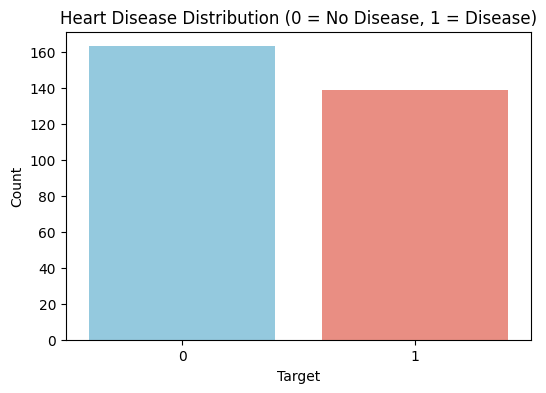

In [12]:
# plot target distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='result', data=df, palette=['skyblue', 'salmon'])
plt.title('Heart Disease Distribution (0 = No Disease, 1 = Disease)')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

**Key Observation**:

plot shows: 

No Disease (0): Around 160 patients 

Disease (1): Around 140 patients 

This indicates a slightly imbalanced dataset (53% healthy vs. 47% with disease). While not severely imbalanced, we should still address this during modeling to avoid bias. 


## Comparison of Categorical Features Against Heart Disease Presence

To understand how categorical features relate to the presence or absence of heart disease, we generated count plots with the target variable (result) as the hue. These plots help us visually assess whether certain categories are more associated with heart disease.

The features visualized include:

gender: Patient sex

cp: Chest pain type

exang: Exercise-induced angina

thal: Thalassemia status

Each bar chart shows how the distribution of classes (0 = No Disease, 1 = Disease) varies across each category.

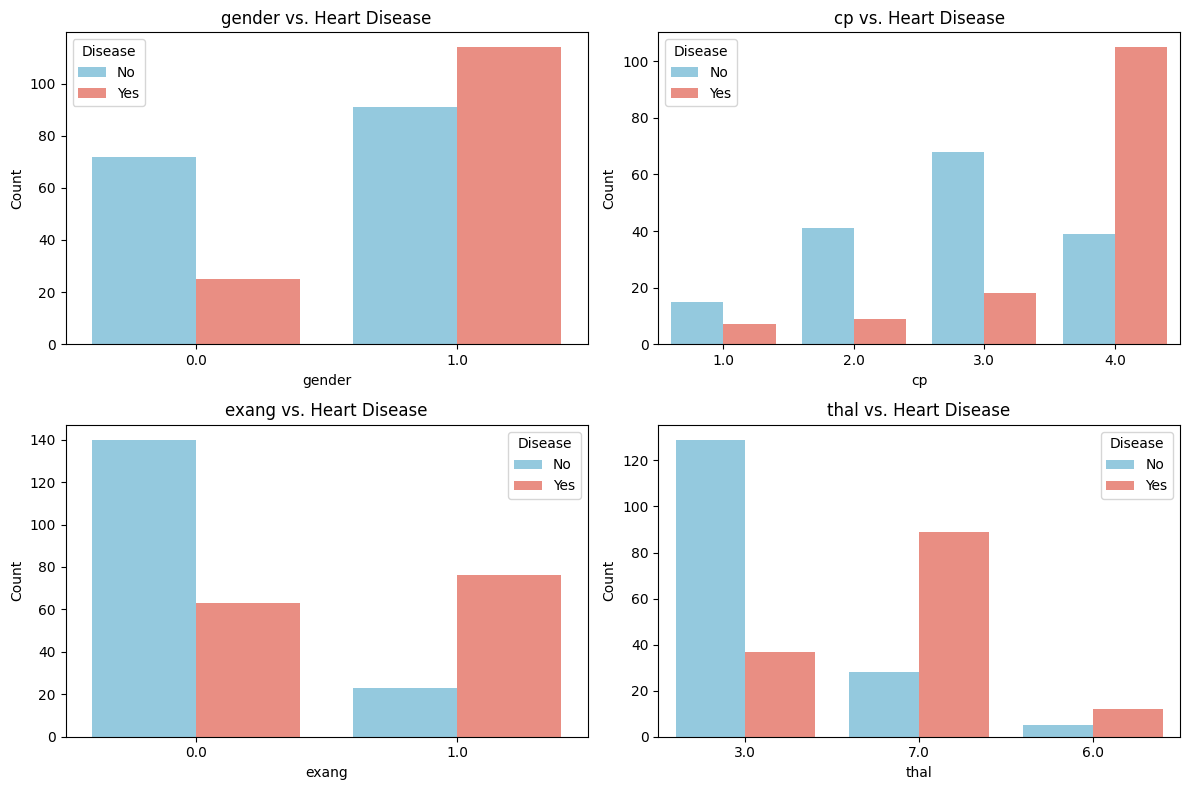

In [13]:
# Categorical attributes
categorical_cols = ['gender', 'cp', 'exang', 'thal']

# Determine the grid size
num_cols = len(categorical_cols)
n_cols_in_grid = 2

# Calculates rows needed
n_rows_in_grid = (num_cols + n_cols_in_grid - 1) // n_cols_in_grid 

# Creating the figure and a grid of subplots
# Adjusting figsize to control the overall size of the combined plot
fig, axes = plt.subplots(nrows=n_rows_in_grid, ncols=n_cols_in_grid, figsize=(n_cols_in_grid * 6, n_rows_in_grid * 4))

# Flatten the axes array for easier iteration if there's more than one row/column
axes = axes.flatten()

# Loop through each categorical column and plot on a subplot
for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, hue='result', data=df, palette=['skyblue', 'salmon'], ax=axes[i])
    axes[i].set_title(f'{col} vs. Heart Disease')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Disease', labels=['No', 'Yes'])

# Adjust layout to prevent titles/labels from overlapping
plt.tight_layout()

# Display the combined figure
plt.show()

**Key Observation**:

1. Gender
•	Male patients (gender = 1):

o	The number of males with heart disease is higher than the number of males without heart disease.

o	Males with heart disease represents the largest group within the plot.

•	Female patients (gender = 0):

o	A significantly higher number of females do not have heart disease compared to those who do.

Interpretation:

In this dataset Males appear to have a prevalence or likelihood of heart disease compared to female.

2. Exercise-Induced Angina (exang)


•	exang = 1 (Yes):

Approximately 75–80% of patients with exercise-induced angina have heart disease.

•	exang = 0 (No):

Majority are healthy, but 30–40% still have heart disease, indicating possible false negatives.

Interpretation:

exang is a highly predictive feature for heart disease and should be prioritized during model training.

4. Chest Pain Type (cp)


•	cp = 4 (Asymptomatic):

Approximately 70–80% of these patients have heart disease, making this the highest-risk group.

•	cp = 1 (Typical Angina):

Mostly associated with no disease (only around 20% have heart disease).

Interpretation:

Asymptomatic patients are at higher risk, possibly due to silent ischemia. This makes cp an important feature for early detection of heart disease.

6. Thalassemia (thal)

•	thal = 7 (Reversible defect):

Around 85–90% of these patients have heart disease.

•	thal = 3 (Normal):

Mostly healthy — 70–75% show no disease.

•	thal = 6 (Fixed defect):

Rare in the dataset; considering merging with thal = 7 due to similar risk level.

Interpretation:

thal is a strong predictor of heart disease. It should be treated as a key feature in modeling. 

Merging high-risk but infrequent categories can help improve model stability.

## Boxplots of Numerical Features vs. Heart Disease

To analyze how numerical attributes differ between patients with and without heart disease, we use boxplots for the following features:

•	age: Patient’s age

•	chol: Serum cholesterol (mg/dl)

•	thalach: Maximum heart rate achieved

These plots show the distribution, central tendency, and spread of each feature across the two classes (result = 0 and 1), helping us visually detect potential predictors or outliers.

Each boxplot represents:

•	The median (horizontal line inside the box)

•	The interquartile range (IQR) (the box itself)

•	Potential outliers (dots outside the whiskers)

•	Class-wise differences in feature distributions

This analysis is useful to identify which numerical features show a clear separation between healthy and diseased patients.

C:\Users\Manav Gupta\AppData\Local\Temp\ipykernel_7020\2671805651.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='result', y=col, data=df, palette=['skyblue', 'salmon'], ax=axes[i])
C:\Users\Manav Gupta\AppData\Local\Temp\ipykernel_7020\2671805651.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='result', y=col, data=df, palette=['skyblue', 'salmon'], ax=axes[i])
C:\Users\Manav Gupta\AppData\Local\Temp\ipykernel_7020\2671805651.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='result', y=col, data=df, palette=['skyblue', 

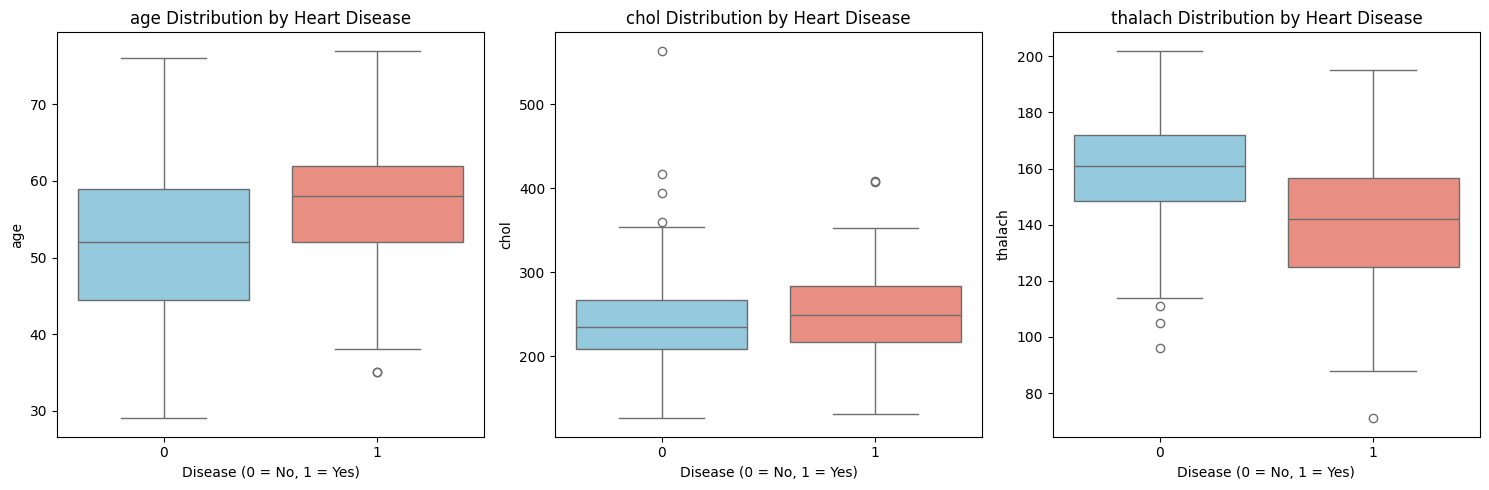

In [14]:
# Numeric attributes you want to plot
numeric_cols = ['age', 'chol', 'thalach']

# Determining the grid size
num_cols_to_plot = len(numeric_cols)
# I want 3 columns to fit all three in one row
n_cols_in_grid = 3 
# Calculates rows needed, should be 1 here
n_rows_in_grid = (num_cols_to_plot + n_cols_in_grid - 1) // n_cols_in_grid 

# Creating the figure and a grid of subplots
# Adjusting figsize to control the overall size of the combined plot
# Making the width larger for 3 columns side-by-side
fig, axes = plt.subplots(nrows=n_rows_in_grid, ncols=n_cols_in_grid, figsize=(n_cols_in_grid * 5, n_rows_in_grid * 5))

# Flatten the axes array for easier iteration (even if it's 1D for 1 row)
axes = axes.flatten()

# Loop through each numeric column and plot on a subplot
for i, col in enumerate(numeric_cols):
    sns.boxplot(x='result', y=col, data=df, palette=['skyblue', 'salmon'], ax=axes[i])
    axes[i].set_title(f'{col} Distribution by Heart Disease')
    axes[i].set_xlabel('Disease (0 = No, 1 = Yes)')
    axes[i].set_ylabel(col)


# Adjust layout to prevent titles/labels from overlapping
plt.tight_layout()

# Display the combined figure
plt.show()

**Key Observation**:

A)	Age distribution by Hear disease

    1.	Heart disease is more common in older patients.

    2.	The median age for patients with heart disease is higher than for those without.

    3.	Clear shift in distribution: age is a moderately predictive feature.

B)	Chol distribution by Heart disease

    1.	Patients with and without disease have overlapping cholesterol ranges.

    2.	Some outliers with very high cholesterol exist in both groups.

    3.	Cholesterol may not be a strong standalone predictor.

C)	thalach distribution by heart disease

    1.	Patients without heart disease tend to have higher max heart rates.

    2.	Strong visual separation: lower thalach is associated with heart disease.

    3.	Thalach is a strong inverse indicator. 


## Feature Correlation Heatmap

To understand the relationships between numerical features and the target variable, we plot a correlation heatmap. This matrix provides a quick overview of how strongly each pair of variables is linearly related.

•	We use Pearson correlation coefficients ranging from -1 (strong negative correlation) to 1 (strong positive correlation).

•	A value close to 0 indicates little to no linear relationship.

•	The heatmap helps identify:

    o	Which features are most associated with the presence of heart disease

    o	Any potential multicollinearity between input features (which could affect certain models)

This step supports better feature selection and interpretation in later stages of model development.


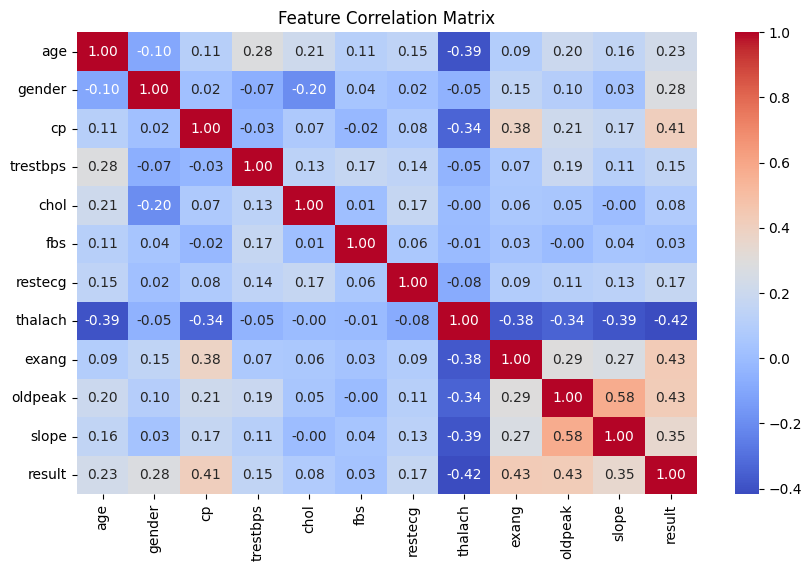

In [15]:
# correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

**Key Observation**:

•	Most positively correlated features with heart disease:

    o	cp (0.41)
    o	exang (0.43)
    o	oldpeak (0.43)
    o	slope (0.35)
•	Most negatively correlated:

    o	thalach (−0.42)
**Insight**:
•	Features like cp, exang, and oldpeak are valuable for predicting disease.

•	thalach has a strong negative correlation — confirming boxplot findings.

•	No extreme multicollinearity between features, so all can likely be used in modeling.

## Scatter Plot Analysis

Scatter plots are used to explore the relationship between two continuous numerical features, allowing us to visually detect patterns, clusters, correlations, or separations between groups.

In the context of heart disease prediction, these plots help us:

•	Examine how two key clinical variables interact (e.g., age vs. heart rate)

•	Determine if there’s a visual distinction between patients with and without heart disease

•	Identify non-linear relationships or overlapping regions between classes

•	Support feature selection and better understanding of feature-target associations

By adding a hue based on the target variable (result), we can compare how feature combinations differ across the two classes — those with heart disease and those without.

**Scatter Plot: Age vs. Maximum Heart Rate**

This scatter plot visualizes the relationship between age and maximum heart rate achieved (thalach), with points colored based on the presence of heart disease.

•	Each point represents an individual patient.

•	The color (hue='result') differentiates between patients with (1) and without (0) heart disease.

•	This type of plot helps detect clusters, trends, or separations between classes across two continuous variables.

This visualization is useful for assessing whether maximum heart rate varies significantly across age groups and whether it can help in distinguishing between the two target classes.

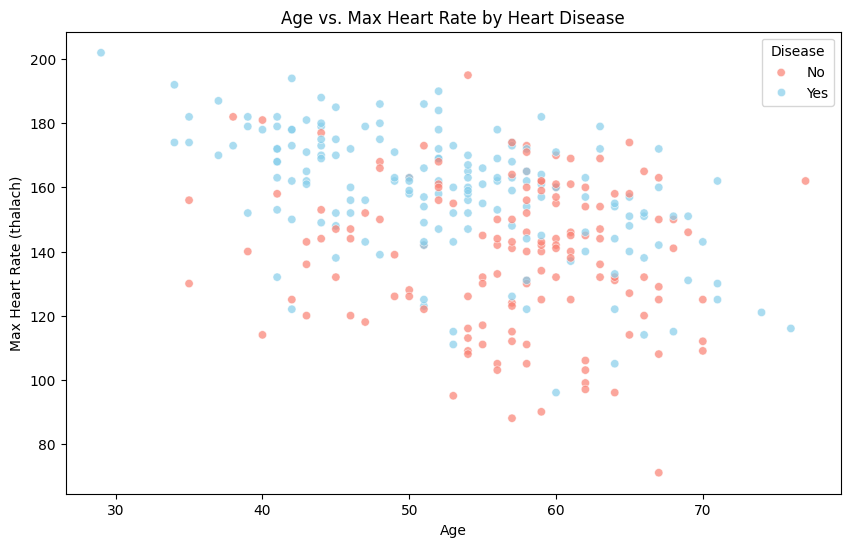

In [16]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='thalach', hue='result', data=df, 
                palette=['skyblue', 'salmon'], alpha=0.7)
plt.title('Age vs. Max Heart Rate by Heart Disease')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate (thalach)')
plt.legend(title='Disease', labels=['No', 'Yes'])
plt.show()

**Key Observation**:

• Patients without disease cluster around higher thalach across age groups.

• Patients with disease tend to have lower max heart rate, especially in middle and older age ranges.

• A downward trend is visible — thalach decreases with age, and disease overlaps with lower values.

**Scatter Plot: Cholesterol vs. ST Depression by Heart Disease**

This scatter plot examines the relationship between serum cholesterol (chol) and ST depression (oldpeak), with points colored by heart disease status (result).

•	X-axis: Cholesterol level (mg/dl)

•	Y-axis: ST depression induced by exercise relative to rest (oldpeak)

•	Hue (Color): Differentiates patients with (1) and without (0) heart disease

Each point represents one patient in the dataset. This visualization helps to:

•	Observe how cholesterol and ST depression interact

•	Identify any clustering patterns that separate the two classes

•	Assess whether these features might jointly contribute to predicting heart disease

By plotting both features together and using color coding, we can better evaluate their potential predictive power in combination.

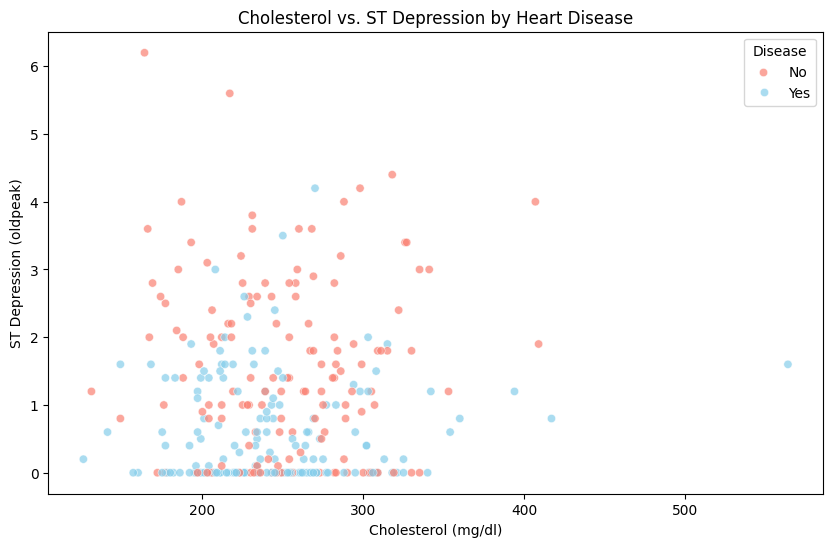

In [17]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='chol', y='oldpeak', hue='result', data=df, 
                palette=['skyblue', 'salmon'], alpha=0.7)
plt.title('Cholesterol vs. ST Depression by Heart Disease')
plt.xlabel('Cholesterol (mg/dl)')
plt.ylabel('ST Depression (oldpeak)')
plt.legend(title='Disease', labels=['No', 'Yes'])
plt.show()

**Key Observation**:

• No strong linear pattern, but:

    •	Patients without disease are clustered near low oldpeak and moderate cholesterol.

    •	Patients with disease are spread across higher oldpeak and wider cholesterol range.

• Suggests that oldpeak may be more predictive than cholesterol.

**Scatter Plot: Age vs. Number of Blocked Vessels by Heart Disease**
This scatter plot illustrates the relationship between a patient's age and the number of major blood vessels blocked (ca), with color indicating heart disease status (result).

•	X-axis: Age

•	Y-axis: Number of major vessels blocked (ca)

•	Hue (Color): Represents heart disease presence (0 = No, 1 = Yes)

Each point represents a patient. This visualization helps to:
    
•	Analyze whether age and vessel blockage severity are jointly associated with heart disease

•	Detect trends, such as whether vessel blockage increases with age or disease presence

•	Understand how blockage levels vary across different age groups and health statuses

By combining a clinical factor (age) with a direct anatomical indicator (ca), this plot provides insight into physical deterioration patterns linked to heart disease.

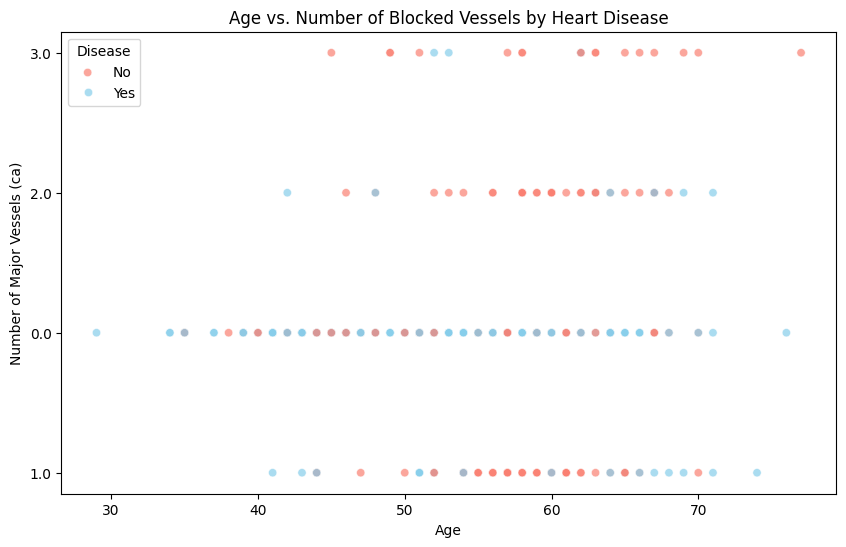

In [18]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='ca', hue='result', data=df, 
                palette=['skyblue', 'salmon'], alpha=0.7)
plt.title('Age vs. Number of Blocked Vessels by Heart Disease')
plt.xlabel('Age')
plt.ylabel('Number of Major Vessels (ca)')
plt.legend(title='Disease', labels=['No', 'Yes'])
plt.show()

**Key Observation**:

• Most patients with 0 vessels blocked (ca = 0) are healthy, especially under age 60.

• Those with heart disease are more frequently found at higher ca values (1 to 3).

• Increasing age is associated with an increase in vessel blockage in both classes, but more pronounced for diseased patients.

# Task 2: Data Preprocessing and Feature Engineering
Before feeding the dataset into machine learning or deep learning models, it is essential to preprocess the data to ensure quality, consistency, and compatibility with training algorithms.

**Objectives of this task**:

Handle missing values appropriately

Ensure correct data types across features

Encode categorical variables if required

Normalize or scale features if needed

Prepare the final dataset for modeling

This is how we ensures that the dataset is clean, well-structured, and in a machine-readable format so that models can learn patterns effectively without being misled by noise, inconsistencies, or incompatible types.

## Data Type Conversion
After analyzing the dataset using .info(), it was observed that several features had incorrect or inconsistent data types:

Features like gender, cp, fbs, and others were stored as float64, even though they represent categorical or integer-based attributes.

The columns ca and thal were of object type due to non-numeric entries (like "?"), which had been replaced with NaN earlier.

**To correct this**:

Integer-based features were explicitly cast to int type.

The ca and thal columns were converted to numeric using pd.to_numeric() with errors='coerce' to ensure invalid values (e.g., strings) are handled as NaN.

These columns were then cast to the Int64 pandas extension type to allow compatibility with missing values.

**Why this is important**:
Ensures that numerical and categorical features are in the correct format for modeling.

Prevents type-related errors during encoding, scaling, or model training.

Supports better memory usage and computational efficiency.

In [19]:
# Data type Conversion
df['age'] = df['age'].astype(int)
df['gender'] = df['gender'].astype(int)
df['cp'] = df['cp'].astype(int)
df['trestbps'] = df['trestbps'].astype(int)
df['chol'] = df['chol'].astype(int)
df['fbs'] = df['fbs'].astype(int)
df['restecg'] = df['restecg'].astype(int)
df['thalach'] = df['thalach'].astype(int)
df['exang'] = df['exang'].astype(int)
df['slope'] = df['slope'].astype(int) 
df['ca'] = pd.to_numeric(df['ca'], errors='coerce').astype('Int64') # ca was object type so it was giving error so used pd.to_numeric
df['thal'] = pd.to_numeric(df['thal'], errors='coerce').astype('Int64') # same with this one like with ca

In [20]:
df.head()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,result
0,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
1,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
2,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
3,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
4,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0


## Handle Missing Values
From earlier .info() and .isnull().sum(), we know:

ca and thal may still have missing values after conversion

using:

Most frequent (mode) is safe and commonly used for categorical-like numeric features.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   gender    302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        298 non-null    Int64  
 12  thal      300 non-null    Int64  
 13  result    302 non-null    int64  
dtypes: Int64(2), float64(1), int64(11)
memory usage: 33.8 KB


**Mode Imputation for Missing Values**

To handle the missing values in the dataset, we applied mode imputation to the following columns:

ca (number of major vessels)

thal (thalassemia type)

Since both of these features are categorical in nature, the most frequent value (mode) is a suitable choice for imputation. This preserves the distribution of the data and avoids introducing bias or removing valuable records.

In [22]:
df['ca'].fillna(df['ca'].mode()[0], inplace=True)
df['thal'].fillna(df['thal'].mode()[0], inplace=True)

C:\Users\Manav Gupta\AppData\Local\Temp\ipykernel_7020\3879146777.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ca'].fillna(df['ca'].mode()[0], inplace=True)
C:\Users\Manav Gupta\AppData\Local\Temp\ipykernel_7020\3879146777.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   gender    302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    Int64  
 12  thal      302 non-null    Int64  
 13  result    302 non-null    int64  
dtypes: Int64(2), float64(1), int64(11)
memory usage: 33.8 KB


 **Feature Engineering: Interaction Term (age * thalach)**
 
To enhance the predictive power of the dataset, we introduced a new interaction feature by multiplying age and maximum heart rate (thalach):

In [24]:
# Creating an interaction feature: age multiplied by maximum heart rate
df['age_thalach_interaction'] = df['age'] * df['thalach']
df

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,result,age_thalach_interaction
0,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1,7236
1,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,8643
2,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,6919
3,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,7052
4,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0,9968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1,5940
298,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1,9588
299,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1,6555
300,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1,9918


**Feature Engineering: Binning Age into Categorical Groups**

As part of exploratory feature engineering, we created a new categorical feature called age_group by binning the continuous age variable into defined age ranges.

**Purpose**:

Converts the continuous age feature into human-readable brackets

Helps explore trends in heart disease across age categories

Useful for tree-based models or interpretability-focused visualizations

May support stratification or subgroup analysis in reporting

**Note**:
This feature is optional and is not required for all models. It has been added for potential use in:

Visual analysis by age group

Tree-based classifiers (e.g., decision trees, random forests)

Feature importance or grouped metrics reporting

We retain the original age column for modeling workflows that require a continuous numerical feature.

In [25]:
bins = [0, 40, 50, 60, 70, 100]
labels = ['<40', '40–50', '50–60', '60–70', '70+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

In [26]:
df.head()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,result,age_thalach_interaction,age_group
0,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1,7236,60–70
1,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,8643,60–70
2,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,6919,<40
3,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,7052,40–50
4,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0,9968,50–60


**Feature Engineering: Pulse Pressure (trestbps - oldpeak)**

**Purpose**:

This feature represents an estimate of resting pulse pressure, derived by subtracting ST depression (oldpeak) from resting blood pressure (trestbps).

Clinically, pulse pressure is an indicator of cardiovascular health and arterial stiffness. Abnormally low or high values can signal underlying heart conditions.

Including this derived metric may help the model better capture risk associated with blood pressure behavior and ischemic response.

This engineered feature is designed to improve the model’s ability to understand complex interactions between blood pressure and heart performance indicators.

In [27]:
df['pulse_pressure'] = df['trestbps'] - df['oldpeak']
df.head()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,result,age_thalach_interaction,age_group,pulse_pressure
0,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1,7236,60–70,158.5
1,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,8643,60–70,117.4
2,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,6919,<40,126.5
3,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,7052,40–50,128.6
4,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0,9968,50–60,119.2


# One-Hot Encoding for Categorical Features

**Encoding Categorical Features (One-Hot Encoding)**

To prepare the dataset for machine learning models, we encode categorical variables using one-hot encoding. This process converts each category level into a separate binary column (0 or 1), allowing algorithms to process them numerically.

Columns Encoded:
cp: Chest pain type

restecg: Resting ECG results

slope: Slope of the ST segment

thal: Thalassemia type

These were chosen because:

They are categorical with more than two unique values

Their numerical representation does not reflect meaningful order

We use pd.get_dummies() with drop_first=True to:

Avoid the dummy variable trap

Reduce multicollinearity

In [28]:
# Define categorical columns to encode (excluding already binary ones)
categorical_cols = ['cp', 'restecg', 'slope', 'thal']

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df_encoded.head()

,age,gender,trestbps,chol,fbs,thalach,exang,oldpeak,ca,result,...,pulse_pressure,cp_2,cp_3,cp_4,restecg_1,restecg_2,slope_2,slope_3,thal_6,thal_7
0,67,1,160,286,0,108,1,1.5,3,1,...,158.5,False,False,True,False,True,True,False,False,False
1,67,1,120,229,0,129,1,2.6,2,1,...,117.4,False,False,True,False,True,True,False,False,True
2,37,1,130,250,0,187,0,3.5,0,0,...,126.5,False,True,False,False,False,False,True,False,False
3,41,0,130,204,0,172,0,1.4,0,0,...,128.6,True,False,False,False,True,False,False,False,False
4,56,1,120,236,0,178,0,0.8,0,0,...,119.2,True,False,False,False,False,False,False,False,False


## Train-Test Split and Numerical Feature Scaling

To prepare the dataset for model training, we split it into training and test sets and apply feature scaling to numerical variables.

**1. Train-Test Split**

We divide the dataset into:

80% training data for model learning

20% testing data for performance evaluation

We use random_state=42 to ensure reproducibility of the split.

python
Copy
Edit


In [29]:
# Define the columns you want to drop from your features (X)
columns_to_drop = ['result', 'age_group']

# Drop both columns to create your feature set X
X = df_encoded.drop(columns=columns_to_drop, axis=1)

# Define your target variable y
y = df_encoded['result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
X

,age,gender,trestbps,chol,fbs,thalach,exang,oldpeak,ca,age_thalach_interaction,pulse_pressure,cp_2,cp_3,cp_4,restecg_1,restecg_2,slope_2,slope_3,thal_6,thal_7
0,67,1,160,286,0,108,1,1.5,3,7236,158.5,False,False,True,False,True,True,False,False,False
1,67,1,120,229,0,129,1,2.6,2,8643,117.4,False,False,True,False,True,True,False,False,True
2,37,1,130,250,0,187,0,3.5,0,6919,126.5,False,True,False,False,False,False,True,False,False
3,41,0,130,204,0,172,0,1.4,0,7052,128.6,True,False,False,False,True,False,False,False,False
4,56,1,120,236,0,178,0,0.8,0,9968,119.2,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,45,1,110,264,0,132,0,1.2,0,5940,108.8,False,False,False,False,False,True,False,False,True
298,68,1,144,193,1,141,0,3.4,2,9588,140.6,False,False,True,False,False,True,False,False,True
299,57,1,130,131,0,115,1,1.2,1,6555,128.8,False,False,True,False,False,True,False,False,True
300,57,0,130,236,0,174,0,0.0,1,9918,130.0,True,False,False,False,True,True,False,False,False


**2. Numerical Scaling (Standardization)**

We apply Z-score scaling using StandardScaler from scikit-learn, which standardizes features by removing the mean and scaling to unit variance.

This is essential for models that are sensitive to feature magnitude (e.g., logistic regression, neural networks).

We scale only the numerical features:

In [31]:
to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'pulse_pressure', 'age_thalach_interaction']

**To prevent data leakage, we:**

Fit the scaler on the training set

Use the same transform on the test set

In [32]:
scaler = StandardScaler()
X_train[to_scale] = scaler.fit_transform(X_train[to_scale])
X_test[to_scale] = scaler.transform(X_test[to_scale])

# Task 3: Model Training and Development – Overview
In the field of healthcare, particularly in the early detection of life-threatening conditions like heart disease, predictive modeling using machine learning (ML) and deep learning (DL) plays a vital role. Accurate prediction models can assist clinicians in identifying high-risk patients, enabling early intervention and improved patient outcomes.

**Objective**:
To develop and train a set of machine learning and deep learning models capable of accurately classifying whether a patient is at risk of heart disease based on a set of clinical attributes.

**Logistic Regression: Model Training and Tuning**

**Objective**:
Build and train a Logistic Regression model to serve as a baseline for predicting heart disease. This model is simple, interpretable, and performs well for binary classification tasks.

In [33]:
# training logistic regression on default parametre
from sklearn.linear_model import LogisticRegression

# Initialize and train the logistic regression model with default settings
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [34]:
# Predict on test data
y_pred = logreg_model.predict(X_test)

# Calculate and print accuracy (rounded to 4 decimal places)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {round(accuracy,2)}")

Model Accuracy: 0.89


**Hyper Tuning**

**defining the base logistic regression model with**:

max_iter=1000: to ensure convergence during training

random_state=42: for reproducibility

In [35]:
logreg = LogisticRegression(max_iter=1000, random_state=42)

**define the combinations of hyperparameters to test**:

C: Controls regularization strength. Lower = stronger penalty on coefficients.

penalty: Type of regularization. 'l1' promotes sparsity, 'l2' keeps all features.

solver: 'liblinear' is compatible with both penalties and suitable for small datasets.

In [36]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],     # Regularization strength
    'penalty': ['l1', 'l2'],          # Type of regularization
    'solver': ['liblinear']           # Solver that supports both l1 and l2
}

We use GridSearchCV to search all combinations in the param_grid

cv=5: 5-fold cross-validation to ensure reliable performance estimation

scoring='accuracy': Optimization criterion

n_jobs=-1: Uses all CPU cores for faster processing


In [37]:
grid_logreg = GridSearchCV(estimator=logreg,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1)

grid_logreg.fit(X_train, y_train)

,estimator,LogisticRegre...ndom_state=42)
,param_grid,"{'C': [0.01, 0.1, ...], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


.best_estimator_: retrieves the model with the best cross-validation score

.best_params_: shows which combination of C, penalty, and solver was selected


In [38]:
best_logreg = grid_logreg.best_estimator_
print("Best Parameters:", grid_logreg.best_params_)

Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


**K-Nearest Neighbors (KNN) – Model Training and Hyperparameter Tuning**

The K-Nearest Neighbors (KNN) algorithm is a simple, non-parametric, lazy learning algorithm used for both classification and regression tasks. In classification, it assigns a class based on the majority class of its 'k' nearest neighbors in the feature space.

To begin the training process for the K-Nearest Neighbors (KNN) algorithm, we initialize the model using its default settings and fit it to the training dataset.

In [39]:
knn_model = KNeighborsClassifier()  # default n_neighbors=5
knn_model.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


**Description**:
Model: KNeighborsClassifier() from sklearn.neighbors

Default behavior: Uses 5 nearest neighbors for classification.

Purpose: The model memorizes the training data. During prediction, it classifies new points based on the majority class of their 5 closest neighbors (Euclidean distance by default).

In [40]:
y_pred_knn = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy (Default Settings): {round(knn_accuracy, 2)}")

KNN Accuracy (Default Settings): 0.87


In [41]:
# KNN model
knn = KNeighborsClassifier()

# Grid of hyperparameters to tune
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [42]:
grid_knn = GridSearchCV(estimator=knn,
                        param_grid=param_grid_knn,
                        scoring='accuracy',
                        cv=5,
                        n_jobs=-1)

grid_knn.fit(X_train, y_train)

,estimator,KNeighborsClassifier()
,param_grid,"{'metric': ['euclidean', 'manhattan'], 'n_neighbors': [3, 5, ...], 'weights': ['uniform', 'distance']}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,5


In [43]:
best_knn = grid_knn.best_estimator_
print("Best Parameters for KNN:", grid_knn.best_params_)

Best Parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}


**Support Vector Machine(SVM) - Model Training and Hyperparameter Tuning**

In [44]:
svm_model = SVC()  # default kernel='rbf', C=1.0
svm_model.fit(X_train, y_train)

# Quick accuracy check (optional)
from sklearn.metrics import accuracy_score
y_pred_svm = svm_model.predict(X_test)
svm_acc = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy (Default): {round(svm_acc, 2)}")

SVM Accuracy (Default): 0.85


In [45]:
# Base model
svm = SVC()

# Define parameter grid
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']  # only used when kernel='rbf'
}

# Grid search with cross-validation
grid_svm = GridSearchCV(estimator=svm,
                        param_grid=param_grid_svm,
                        scoring='accuracy',
                        cv=5,
                        n_jobs=-1)

grid_svm.fit(X_train, y_train)

,estimator,SVC()
,param_grid,"{'C': [0.1, 1, ...], 'gamma': ['scale', 'auto'], 'kernel': ['linear', 'rbf']}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,1


In [46]:
best_svm = grid_svm.best_estimator_
print("Best Parameters for SVM:", grid_svm.best_params_)

Best Parameters for SVM: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}


**Random Forest - Model Training and Hyperparameter Tuning**

In [47]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Optional quick accuracy check
y_pred_rf = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy (Default): {round(rf_acc, 2)}")



# Define the base model
rf = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 200],       # Number of trees
    'max_depth': [None, 5, 10],           # Maximum depth of each tree
    'min_samples_split': [2, 5],          # Min samples to split an internal node
    'min_samples_leaf': [1, 2],           # Min samples at a leaf node
    'max_features': ['sqrt', 'log2']      # Number of features to consider when looking for best split
}

# Grid search with 5-fold CV
grid_rf = GridSearchCV(estimator=rf,
                       param_grid=param_grid_rf,
                       scoring='accuracy',
                       cv=5,
                       n_jobs=-1)

grid_rf.fit(X_train, y_train)

Random Forest Accuracy (Default): 0.85


,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [None, 5, ...], 'max_features': ['sqrt', 'log2'], 'min_samples_leaf': [1, 2], 'min_samples_split': [2, 5], ...}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,50


In [48]:
best_rf = grid_rf.best_estimator_
print("Best Parameters for Random Forest:", grid_rf.best_params_)

Best Parameters for Random Forest: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}


**XGBoost - Model Training and Hyperparameter Tuning**

In [49]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Quick test accuracy (optional)
y_pred_xgb = xgb_model.predict(X_test)
xgb_acc = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy (Default): {round(xgb_acc, 2)}")

XGBoost Accuracy (Default): 0.89


C:\Users\Manav Gupta\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:44:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [50]:
param_grid_xgb = {
    'n_estimators': [50, 100, 200],         # Number of boosting rounds (trees)
    'max_depth': [3, 5, 7],                 # Depth of each tree
    'learning_rate': [0.01, 0.1, 0.3],      # Shrinkage rate
    'subsample': [0.8, 1],                  # % of rows used per tree
    'colsample_bytree': [0.8, 1]            # % of features used per tree
}



grid_xgb = GridSearchCV(estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
                        param_grid=param_grid_xgb,
                        scoring='accuracy',
                        cv=5,
                        n_jobs=-1)

grid_xgb.fit(X_train, y_train)



best_xgb = grid_xgb.best_estimator_
print("Best Parameters for XGBoost:", grid_xgb.best_params_)

Best Parameters for XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


C:\Users\Manav Gupta\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:44:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


**Building & Training a Deep Learning Model Using PyTorch**

In [51]:
print(torch.__version__)
print(torch.cuda.is_available())

2.7.1+cpu
False


In [52]:
# Convert numpy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)

X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

TypeError: can't convert np.ndarray of type numpy.object_. The only supported types are: float64, float32, float16, complex64, complex128, int64, int32, int16, int8, uint64, uint32, uint16, uint8, and bool.

In [53]:
print(X_train.dtypes)

age                        float64
gender                       int64
trestbps                   float64
chol                       float64
fbs                          int64
thalach                    float64
exang                        int64
oldpeak                    float64
ca                           Int64
age_thalach_interaction    float64
pulse_pressure             float64
cp_2                          bool
cp_3                          bool
cp_4                          bool
restecg_1                     bool
restecg_2                     bool
slope_2                       bool
slope_3                       bool
thal_6                        bool
thal_7                        bool
dtype: object


In [54]:
# Converting boolean columns to integers (0 or 1)
X_train = X_train.astype({col: 'int' for col in X_train.select_dtypes('bool').columns})
X_test = X_test.astype({col: 'int' for col in X_test.select_dtypes('bool').columns})



X_train = X_train.astype('float32')
X_test = X_test.astype('float32')



X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)

X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

**Basic MLP Model**

In [56]:
class BasicMLP(nn.Module):
    def __init__(self, input_dim):
        super(BasicMLP, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        return self.model(x)

basic_model = BasicMLP(X_train.shape[1])

criterion = nn.BCELoss()
basic_optimizer = torch.optim.Adam(basic_model.parameters(), lr=0.001)



# Create DataLoader if not already done
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Training loop
num_epochs = 50
basic_model.train()

for epoch in range(num_epochs):
    running_loss = 0.0
    for batch_X, batch_y in train_loader:
        basic_optimizer.zero_grad()
        outputs = basic_model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        basic_optimizer.step()
        running_loss += loss.item()
    if (epoch+1) % 5 == 0:
        print(f"Basic MLP - Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss:.4f}")

Basic MLP - Epoch [5/50], Loss: 4.3682
Basic MLP - Epoch [10/50], Loss: 3.1358
Basic MLP - Epoch [15/50], Loss: 2.6082
Basic MLP - Epoch [20/50], Loss: 2.4733
Basic MLP - Epoch [25/50], Loss: 2.1910
Basic MLP - Epoch [30/50], Loss: 1.9369
Basic MLP - Epoch [35/50], Loss: 1.6758
Basic MLP - Epoch [40/50], Loss: 1.5784
Basic MLP - Epoch [45/50], Loss: 1.4978
Basic MLP - Epoch [50/50], Loss: 1.2072


In [57]:
# Set model to evaluation mode
basic_model.eval()

# Disable gradient calculation for evaluation
with torch.no_grad():
    y_pred_prob_basic = basic_model(X_test_tensor)
    y_pred_basic = (y_pred_prob_basic > 0.5).float()

# Calculate and print accuracy
basic_accuracy = accuracy_score(y_test_tensor.numpy(), y_pred_basic.numpy())
print(f"Test Accuracy (Basic MLP): {round(basic_accuracy, 2)}")


Test Accuracy (Basic MLP): 0.82


**Deep MLP Model**

In [58]:
class DeepMLP(nn.Module):
    def __init__(self, input_dim):
        super(DeepMLP, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)



deep_model = DeepMLP(X_train.shape[1])

criterion = nn.BCELoss()
deep_optimizer = torch.optim.Adam(deep_model.parameters(), lr=0.001)



num_epochs = 50
deep_model.train()

for epoch in range(num_epochs):
    running_loss = 0.0
    for batch_X, batch_y in train_loader:
        deep_optimizer.zero_grad()
        outputs = deep_model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        deep_optimizer.step()
        running_loss += loss.item()
    
    if (epoch + 1) % 5 == 0:
        print(f"Deep MLP - Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss:.4f}")

Deep MLP - Epoch [5/50], Loss: 3.5814
Deep MLP - Epoch [10/50], Loss: 2.5635
Deep MLP - Epoch [15/50], Loss: 2.0713
Deep MLP - Epoch [20/50], Loss: 1.7114
Deep MLP - Epoch [25/50], Loss: 1.4286
Deep MLP - Epoch [30/50], Loss: 1.0940
Deep MLP - Epoch [35/50], Loss: 0.6352
Deep MLP - Epoch [40/50], Loss: 0.4042
Deep MLP - Epoch [45/50], Loss: 0.2220
Deep MLP - Epoch [50/50], Loss: 0.1433


In [59]:
# Set model to evaluation mode
deep_model.eval()

# Disable gradient calculation for evaluation
with torch.no_grad():
    y_pred_prob_deep = deep_model(X_test_tensor)
    y_pred_deep = (y_pred_prob_deep > 0.5).float()

# Calculate and print accuracy
deep_accuracy = accuracy_score(y_test_tensor.numpy(), y_pred_deep.numpy())
print(f"Test Accuracy (Deep MLP): {round(deep_accuracy, 2)}")

Test Accuracy (Deep MLP): 0.82


In [78]:
import matplotlib.pyplot as plt

# For Basic MLP
basic_losses = []

basic_model.train()
for epoch in range(num_epochs):
    running_loss = 0.0
    for batch_X, batch_y in train_loader:
        basic_optimizer.zero_grad()
        outputs = basic_model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        basic_optimizer.step()
        running_loss += loss.item()
    
    basic_losses.append(running_loss)
    if (epoch+1) % 5 == 0:
        print(f"Basic MLP - Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss:.4f}")


# For Deep MLP
deep_losses = []

deep_model.train()
for epoch in range(num_epochs):
    running_loss = 0.0
    for batch_X, batch_y in train_loader:
        deep_optimizer.zero_grad()
        outputs = deep_model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        deep_optimizer.step()
        running_loss += loss.item()
    
    deep_losses.append(running_loss)
    if (epoch+1) % 5 == 0:
        print(f"Deep MLP - Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss:.4f}")


Basic MLP - Epoch [5/50], Loss: 1.1000
Basic MLP - Epoch [10/50], Loss: 0.9711
Basic MLP - Epoch [15/50], Loss: 0.8179
Basic MLP - Epoch [20/50], Loss: 0.8474
Basic MLP - Epoch [25/50], Loss: 0.6248
Basic MLP - Epoch [30/50], Loss: 0.5655
Basic MLP - Epoch [35/50], Loss: 0.4697
Basic MLP - Epoch [40/50], Loss: 0.4198
Basic MLP - Epoch [45/50], Loss: 0.3774
Basic MLP - Epoch [50/50], Loss: 0.3188
Deep MLP - Epoch [5/50], Loss: 0.0778
Deep MLP - Epoch [10/50], Loss: 0.0503
Deep MLP - Epoch [15/50], Loss: 0.0365
Deep MLP - Epoch [20/50], Loss: 0.0279
Deep MLP - Epoch [25/50], Loss: 0.0210
Deep MLP - Epoch [30/50], Loss: 0.0161
Deep MLP - Epoch [35/50], Loss: 0.0137
Deep MLP - Epoch [40/50], Loss: 0.0112
Deep MLP - Epoch [45/50], Loss: 0.0095
Deep MLP - Epoch [50/50], Loss: 0.0082


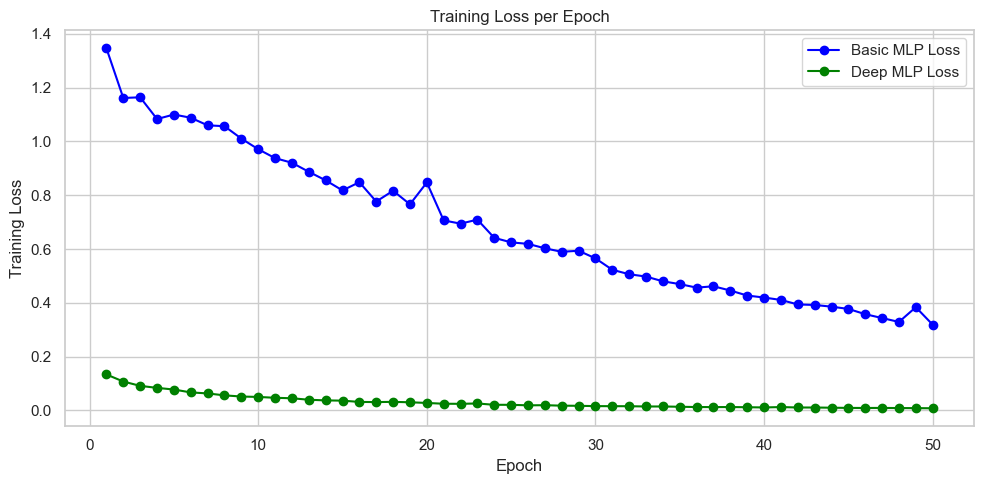

In [79]:
# Plot training loss for both models
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), basic_losses, label='Basic MLP Loss', color='blue', marker='o')
plt.plot(range(1, num_epochs + 1), deep_losses, label='Deep MLP Loss', color='green', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss per Epoch')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
class BasicMLP(nn.Module):
    def __init__(self, input_dim):
        super(BasicMLP, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        return self.model(x)

basic_model = BasicMLP(X_train.shape[1])

criterion = nn.BCELoss()
basic_optimizer = torch.optim.Adam(basic_model.parameters(), lr=0.001)



# Create DataLoader if not already done
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Training loop
num_epochs = 50
basic_model.train()

for epoch in range(num_epochs):
    running_loss = 0.0
    for batch_X, batch_y in train_loader:
        basic_optimizer.zero_grad()
        outputs = basic_model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        basic_optimizer.step()
        running_loss += loss.item()
    if (epoch+1) % 5 == 0:
        print(f"Basic MLP - Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss:.4f}")

# Set model to evaluation mode
basic_model.eval()

# Disable gradient calculation for evaluation
with torch.no_grad():
    y_pred_prob_basic = basic_model(X_test_tensor)
    y_pred_basic = (y_pred_prob_basic > 0.5).float()

# Calculate and print accuracy
basic_accuracy = accuracy_score(y_test_tensor.numpy(), y_pred_basic.numpy())
print(f"Test Accuracy (Basic MLP): {round(basic_accuracy, 2)}")


class DeepMLP(nn.Module):
    def __init__(self, input_dim):
        super(DeepMLP, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)



deep_model = DeepMLP(X_train.shape[1])

criterion = nn.BCELoss()
deep_optimizer = torch.optim.Adam(deep_model.parameters(), lr=0.001)



num_epochs = 50
deep_model.train()

for epoch in range(num_epochs):
    running_loss = 0.0
    for batch_X, batch_y in train_loader:
        deep_optimizer.zero_grad()
        outputs = deep_model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        deep_optimizer.step()
        running_loss += loss.item()
    
    if (epoch + 1) % 5 == 0:
        print(f"Deep MLP - Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss:.4f}")

# Set model to evaluation mode
deep_model.eval()

# Disable gradient calculation for evaluation
with torch.no_grad():
    y_pred_prob_deep = deep_model(X_test_tensor)
    y_pred_deep = (y_pred_prob_deep > 0.5).float()

# Calculate and print accuracy
deep_accuracy = accuracy_score(y_test_tensor.numpy(), y_pred_deep.numpy())
print(f"Test Accuracy (Deep MLP): {round(deep_accuracy, 2)}")

# Task 4: Model Evaluation and Comparison

In [60]:
def evaluate_model(model, X_test, y_test, model_name="Model"):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred

    print(f"🔹 {model_name}")
    print("Accuracy:", round(accuracy_score(y_test, y_pred), 2))
    print("ROC-AUC:", round(roc_auc_score(y_test, y_proba), 2))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("-" * 50)

In [61]:
evaluate_model(logreg_model, X_test, y_test, "Logistic Regression")
evaluate_model(best_logreg, X_test, y_test, "Tuned Logistic Regression")
evaluate_model(knn_model, X_test, y_test, "KNN Model")
evaluate_model(best_knn, X_test, y_test, "Tuned KNN Model")
evaluate_model(svm_model, X_test, y_test, "SVM Model")
evaluate_model(best_svm, X_test, y_test, "Tuned SVM Model")
evaluate_model(rf_model, X_test, y_test, "Random Forest Model")
evaluate_model(best_rf, X_test, y_test, "Tuned Random Forest Model")
evaluate_model(xgb_model, X_test, y_test, "XGBoost Model")
evaluate_model(best_xgb, X_test, y_test, "Tuned XGBoost Model")

🔹 Logistic Regression
Accuracy: 0.89
ROC-AUC: 0.92
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89        32
           1       0.87      0.90      0.88        29

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61

Confusion Matrix:
 [[28  4]
 [ 3 26]]
--------------------------------------------------
🔹 Tuned Logistic Regression
Accuracy: 0.85
ROC-AUC: 0.91
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.84      0.86        32
           1       0.83      0.86      0.85        29

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

Confusion Matrix:
 [[27  5]
 [ 4 25]]
--------------------------------------------------
🔹 KNN Model


In [63]:
def evaluate_pytorch_model(model, X_test_tensor, y_test_tensor, model_name="PyTorch Model"):
    model.eval()
    with torch.no_grad():
        y_pred_prob = model(X_test_tensor)
        y_pred_class = (y_pred_prob > 0.5).float()

    y_true = y_test_tensor.numpy()
    y_pred = y_pred_class.numpy()
    y_prob = y_pred_prob.numpy()

    print(f"🔹 {model_name}")
    print("Accuracy:", round(accuracy_score(y_true, y_pred), 2))
    print("ROC-AUC:", round(roc_auc_score(y_true, y_prob), 2))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("-" * 50)

In [64]:
evaluate_pytorch_model(basic_model, X_test_tensor, y_test_tensor, "Basic MLP (PyTorch)")
evaluate_pytorch_model(deep_model, X_test_tensor, y_test_tensor, "Deep MLP (PyTorch)")

🔹 Basic MLP (PyTorch)
Accuracy: 0.82
ROC-AUC: 0.89
Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.81      0.83        32
         1.0       0.80      0.83      0.81        29

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

Confusion Matrix:
 [[26  6]
 [ 5 24]]
--------------------------------------------------
🔹 Deep MLP (PyTorch)
Accuracy: 0.82
ROC-AUC: 0.86
Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.81      0.83        32
         1.0       0.80      0.83      0.81        29

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

Confusion Matrix:
 [[26  6]
 [ 5 24]]
--------------------------------------------------


C:\Users\Manav Gupta\AppData\Local\Temp\ipykernel_7020\3652026531.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette='viridis')


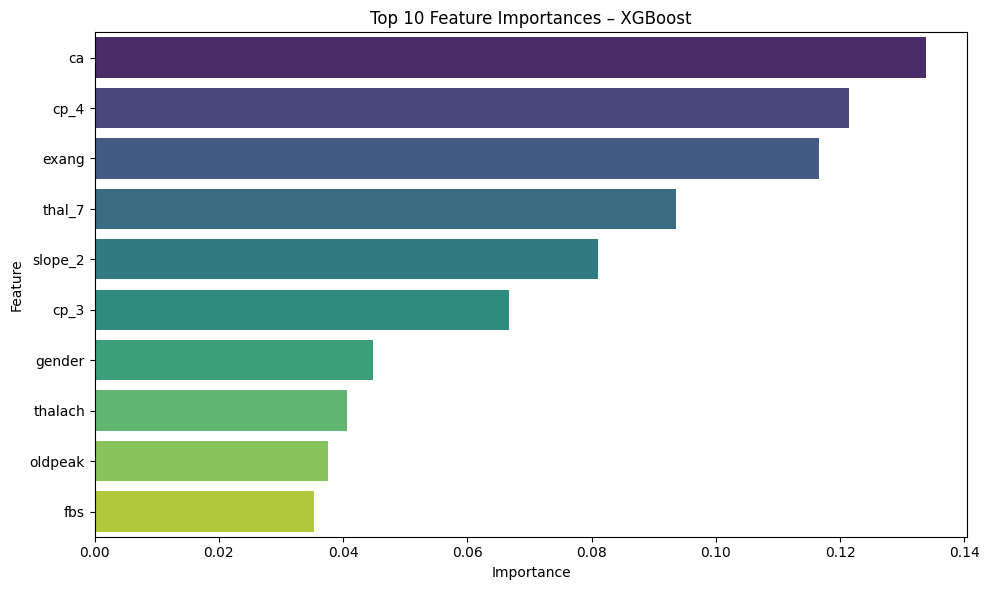

In [66]:
feature_importances = best_xgb.feature_importances_
features = X_train.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot making
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette='viridis')
plt.title('Top 10 Feature Importances – XGBoost')
plt.tight_layout()
plt.show()


In [67]:
class TorchSklearnWrapper:
    def __init__(self, model):
        self.model = model
        self.model.eval()

    def fit(self, X, y):
        # Dummy method for compatibility
        return self

    def predict(self, X):
        with torch.no_grad():
            tensor_X = torch.tensor(X.values, dtype=torch.float32)
            probs = self.model(tensor_X)
            return (probs > 0.5).int().numpy()

    def score(self, X, y):
        from sklearn.metrics import accuracy_score
        y_pred = self.predict(X)
        return accuracy_score(y, y_pred)

In [68]:
wrapped_mlp = TorchSklearnWrapper(deep_model)

result = permutation_importance(wrapped_mlp, X_test, y_test, n_repeats=10, random_state=42)

perm_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=perm_df.head(10), palette='magma')
plt.title('Top 10 Feature Importances – Deep MLP (Permutation Importance)')
plt.tight_layout()
plt.show()


NameError: name 'permutation_importance' is not defined

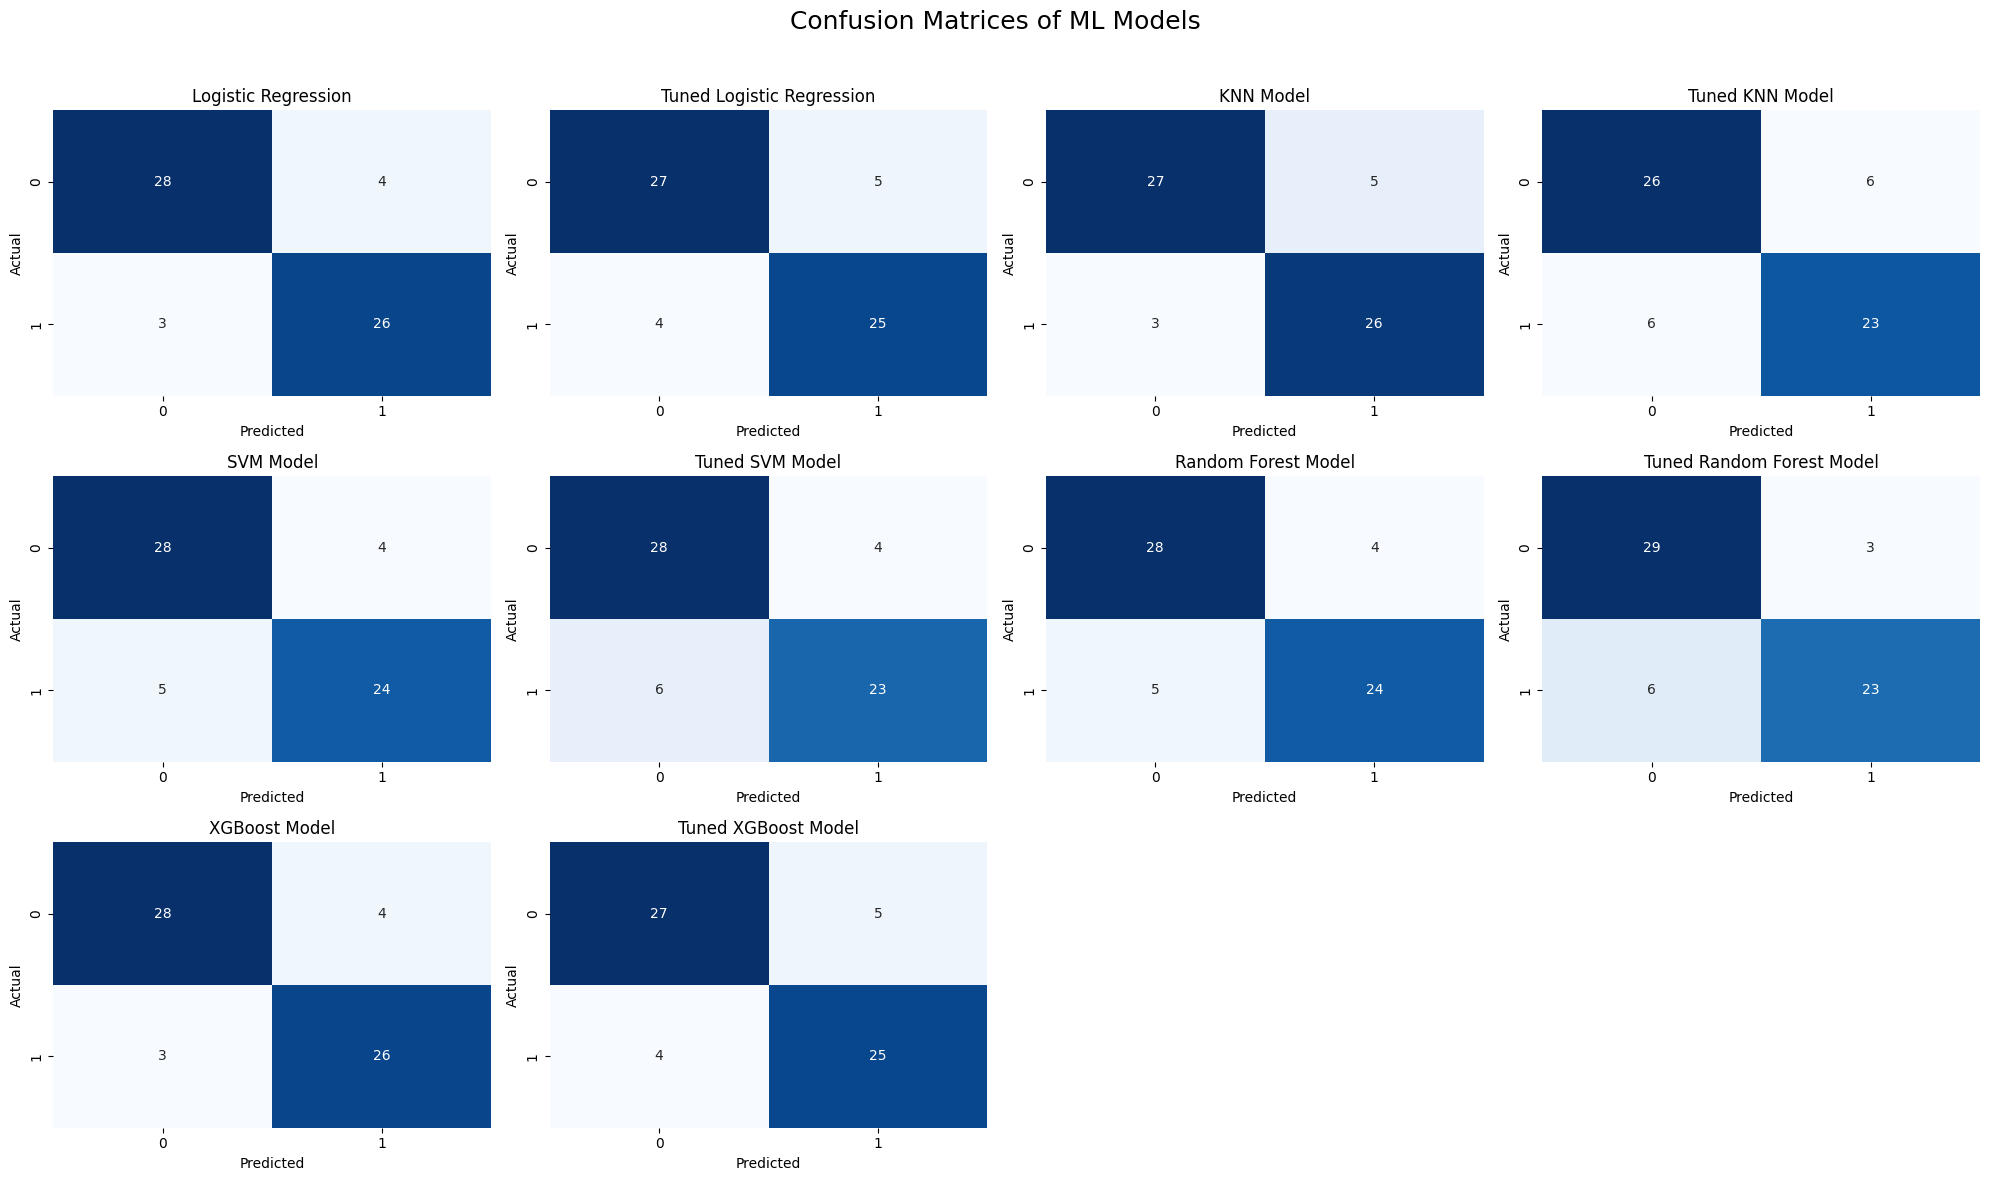

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Model list (name, model)
models = [
    ("Logistic Regression", logreg_model),
    ("Tuned Logistic Regression", best_logreg),
    ("KNN Model", knn_model),
    ("Tuned KNN Model", best_knn),
    ("SVM Model", svm_model),
    ("Tuned SVM Model", best_svm),
    ("Random Forest Model", rf_model),
    ("Tuned Random Forest Model", best_rf),
    ("XGBoost Model", xgb_model),
    ("Tuned XGBoost Model", best_xgb)
]

# Create 3x4 grid for 10 plots
fig, axes = plt.subplots(3, 4, figsize=(20, 12))
fig.suptitle("Confusion Matrices of ML Models", fontsize=18)

for ax, (name, model) in zip(axes.flatten(), models):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False)
    ax.set_title(name)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

# Remove unused subplot (last 2 if less than 12)
for i in range(len(models), 12):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for suptitle
plt.show()


In [70]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def get_model_metrics(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    }


In [71]:
import pandas as pd

# Model list (name, model)
models = [
    ("Logistic Regression", logreg_model),
    ("Tuned Logistic Regression", best_logreg),
    ("KNN Model", knn_model),
    ("Tuned KNN Model", best_knn),
    ("SVM Model", svm_model),
    ("Tuned SVM Model", best_svm),
    ("Random Forest Model", rf_model),
    ("Tuned Random Forest Model", best_rf),
    ("XGBoost Model", xgb_model),
    ("Tuned XGBoost Model", best_xgb)
]

# Gather metrics
results = []
for name, model in models:
    metrics = get_model_metrics(model, X_test, y_test)
    metrics['Model'] = name
    results.append(metrics)

# Convert to DataFrame
metrics_df = pd.DataFrame(results)


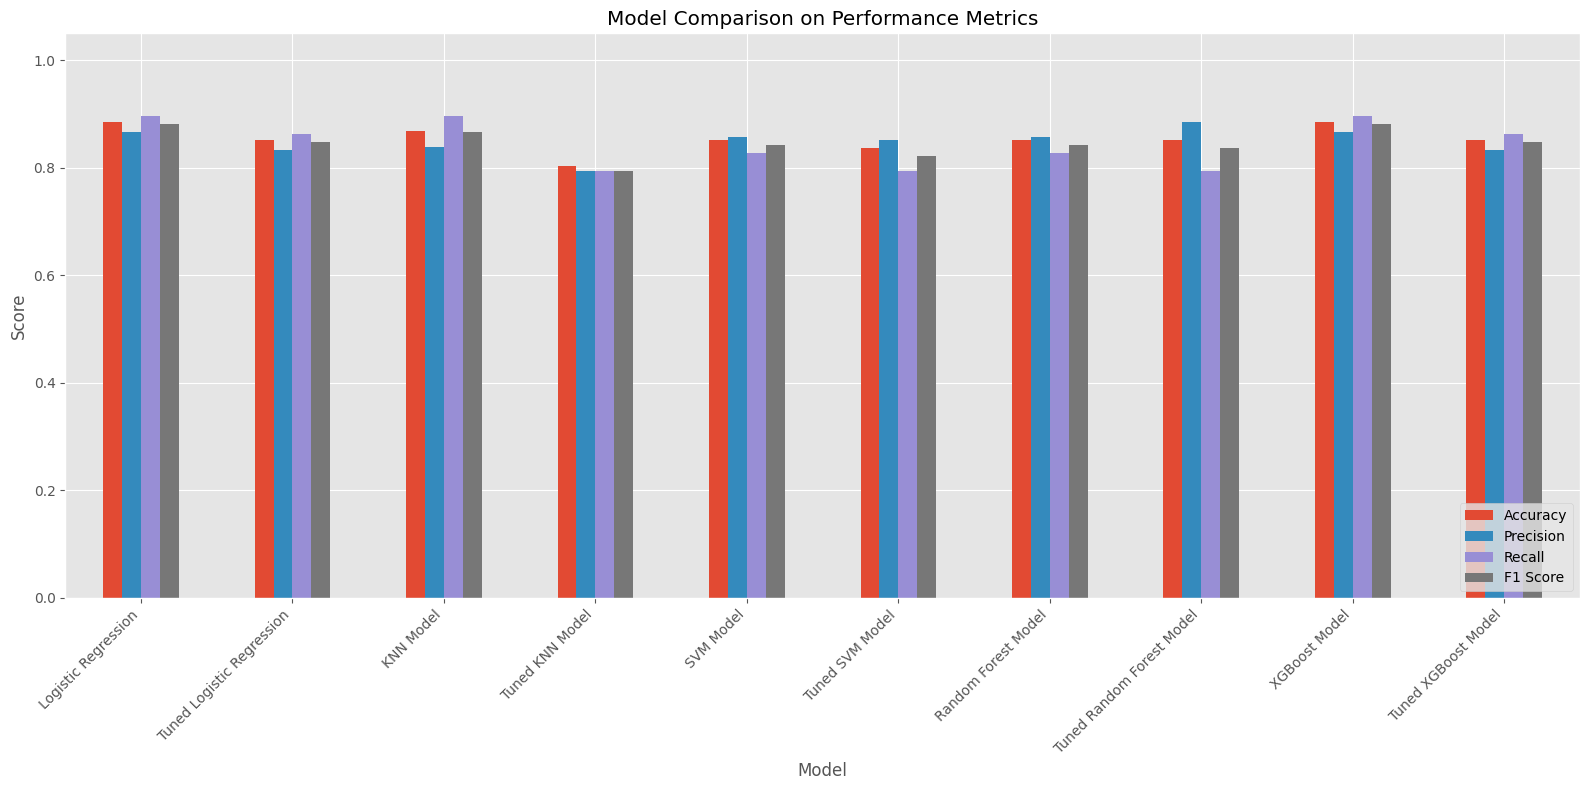

In [73]:
import matplotlib.pyplot as plt

# Set style
plt.style.use('ggplot')  # Clean and widely supported

metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Plot
metrics_df.set_index('Model')[metrics_to_plot].plot(kind='bar', figsize=(16, 8))
plt.title('Model Comparison on Performance Metrics')
plt.ylabel('Score')
plt.ylim(0, 1.05)
plt.xticks(rotation=45, ha='right')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


C:\Users\Manav Gupta\AppData\Local\Temp\ipykernel_7020\3106128333.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette="viridis")


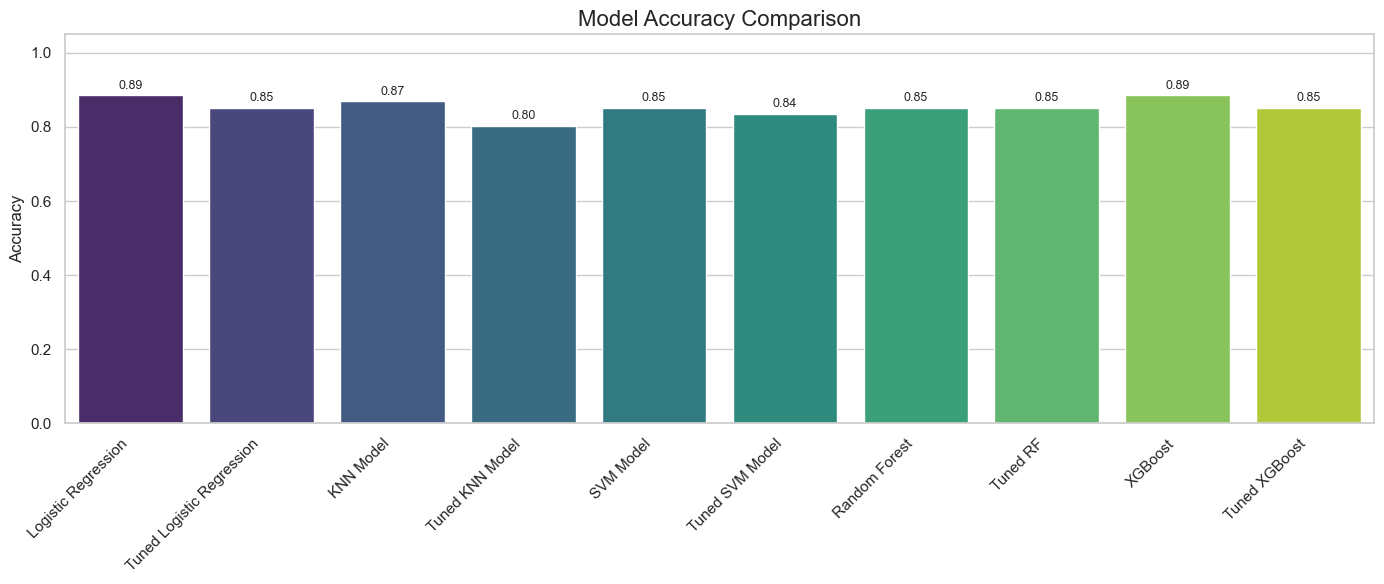

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

# Model names and objects
model_names = [
    "Logistic Regression", "Tuned Logistic Regression",
    "KNN Model", "Tuned KNN Model",
    "SVM Model", "Tuned SVM Model",
    "Random Forest", "Tuned RF",
    "XGBoost", "Tuned XGBoost"
]

models = [
    logreg_model, best_logreg,
    knn_model, best_knn,
    svm_model, best_svm,
    rf_model, best_rf,
    xgb_model, best_xgb
]

# Calculate accuracy for each model
accuracies = [accuracy_score(y_test, model.predict(X_test)) for model in models]

# Plot the bar chart
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 6))
sns.barplot(x=model_names, y=accuracies, palette="viridis")

# Add accuracy value on top of each bar
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center', va='bottom', fontsize=9)

# Final plot settings
plt.title("Model Accuracy Comparison", fontsize=16)
plt.ylabel("Accuracy")
plt.ylim(0, 1.05)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
